# 시계열 분석 프로젝트
## STM 분해
### Download data for test
kaggle의 hive데이터를 다운로드하고 로드하는 연습을 진행합니다.
공식적인 dataset_load는 버그때문에 deprecated 되었습니다.
때문에 pandas 라이브러리를 이용해 로드하는 방식을 권장합니다.

In [25]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vivovinco/beehives")

print("Path to dataset files:", path)

Path to dataset files: /Users/chy-mac/.cache/kagglehub/datasets/vivovinco/beehives/versions/7


In [26]:
import kagglehub
import pandas as pd
import numpy as np
import os
from pathlib import Path

def modern_kagglehub_approach():
    """현대적인 kagglehub 사용법"""
    
    print("1️⃣ kagglehub로 데이터셋 다운로드만 담당")
    print("2️⃣ pandas로 직접 파일 읽기")
    print()
    
    # Step 1: 이미 다운로드되어 있지만, 일반적인 사용법 설명
    # dataset_path = kagglehub.dataset_download("vivovinco/beehives")
    
    # Step 2: 다운로드된 경로에서 pandas로 직접 읽기
    print(f"📁 다운로드된 경로: {path}")
    
    # 파일 목록 확인
    csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
    print(f"📋 CSV 파일들: {csv_files}")
    
    # 각 파일의 기본 정보 확인
    for filename in csv_files:
        file_path = os.path.join(path, filename)
        df = pd.read_csv(file_path, nrows=5)  # 첫 5행만 읽어서 확인
        print(f"\n🐝 {filename}:")
        print(f"   컬럼: {list(df.columns)}")
        print(f"   샘플 데이터:")
        for col in df.columns[:3]:  # 처음 3개 컬럼만
            print(f"     {col}: {df[col].iloc[0]}")

modern_kagglehub_approach()


1️⃣ kagglehub로 데이터셋 다운로드만 담당
2️⃣ pandas로 직접 파일 읽기

📁 다운로드된 경로: /Users/chy-mac/.cache/kagglehub/datasets/vivovinco/beehives/versions/7
📋 CSV 파일들: ['Hive85.csv', 'Hive36.csv', 'Hive17.csv']

🐝 Hive85.csv:
   컬럼: ['Hour;DateTime;T85;RH85;AT85;Tamb;RHamb;ATamb;T85-Tamb;AT85-ATamb']
   샘플 데이터:
     Hour;DateTime;T85;RH85;AT85;Tamb;RHamb;ATamb;T85-Tamb;AT85-ATamb: 1;21.08.2021 14:00;36.3;78;48.4;28.8;33;29.1;7.5;19.3

🐝 Hive36.csv:
   컬럼: ['Hour;DateTime;T36;RH36;AT36;Tamb;RHamb;ATamb;T36-Tamb;AT36-ATamb']
   샘플 데이터:
     Hour;DateTime;T36;RH36;AT36;Tamb;RHamb;ATamb;T36-Tamb;AT36-ATamb: 1847;6.11.2021 12:00;29.2;66;34.3;23.6;49;24.3;5.6;10.0

🐝 Hive17.csv:
   컬럼: ['Hour;DateTime;T17;RH17;AT17;Tamb;RHamb;ATamb;T17-Tamb;AT17-ATamb']
   샘플 데이터:
     Hour;DateTime;T17;RH17;AT17;Tamb;RHamb;ATamb;T17-Tamb;AT17-ATamb: 1;21.08.2021 14:00;32.8;47;36.6;28.8;33;29.1;4.0;7.5


### STL Depomsition
 "Seasonal and Trend decomposition using Loess"의 줄임말로서 Loess를 이용해 계절성과 추세성을 분리하는 알고리즘을 의미한다. 더하여 잔차를 남기게 되어 노이즈 제거의 목적도 포함한다.

 Loess는 데이터의 평균을 내는 방법 중 하나로서 국소적 산포에 대한 가중치를 이용해 회귀분석을 하겠다는 것이다. 줄임말의 원형 "Locally Weighted Scatterplot smoothing"의 그 자체가 원리가 된다.
 즉, 다시 말해서 STL 분해는 여러번의 반복적인 회귀분석에 대해서 주파수에 대한 통계를 획득해 '계절성'과 '추세성'을 획득하는 고전통계기법이다. 
 
 이어지는 호출에서 각 인자가 갖는 통계적 의미를 알아보게 될 것이다.

데이터의 의미는 아래와 같음
```
Content
+1000 rows and 10 columns.
Columns' description are listed below.

DateTime : Datetime in "dd.mm.yyyy hh:mm" format
T17 : Temperature of hive 17
RH17 : Relative humidity of hive 17
AT17 : Apparent temperature of hive 17
Tamb : Ambient temperature
RHamb : Ambient relative humidity
ATamb : Ambient apparent temperature
T17-Tamb : T17 - Tamb
AT17-ATamb : AT17 - ATamb
```


In [38]:
df = pd.read_csv(Path(path)/"Hive17.csv", sep=";")
df = df.dropna()
df

,Hour,DateTime,T17,RH17,AT17,Tamb,RHamb,ATamb,T17-Tamb,AT17-ATamb
0,1,21.08.2021 14:00,32.8,47,36.6,28.8,33,29.1,4.0,7.5
1,2,21.08.2021 15:00,33.3,46,37.1,28.8,36,29.5,4.5,7.6
2,3,21.08.2021 16:00,33.5,46,37.4,28.9,35,29.5,4.6,7.9
3,4,21.08.2021 17:00,33.8,49,38.5,28.5,36,29.1,5.3,9.3
4,5,21.08.2021 18:00,33.8,51,38.8,27.5,40,28.4,6.3,10.4
...,...,...,...,...,...,...,...,...,...,...
1842,1843,6.11.2021 08:00,15.9,77,16.5,13.1,100,14.1,2.8,2.4
1843,1844,6.11.2021 09:00,16.3,77,17.0,15.3,87,16.3,1.0,0.8
1844,1845,6.11.2021 10:00,17.2,79,18.3,18.9,68,19.8,-1.7,-1.5
1845,1846,6.11.2021 11:00,19.4,81,21.4,21.5,56,22.2,-2.1,-0.8


In [39]:
# T17 온도 데이터 로딩 및 전처리
print("✅ 데이터 로딩 완료!")
print(f"📋 컬럼들: {list(df.columns)}")
print(f"📊 데이터 크기: {df.shape}")
print(f"📅 데이터 기간: {df['Hour'].min()} ~ {df['Hour'].max()}")
print(f"⏰ 총 데이터 포인트: {len(df):,}개")

# 기본 통계 정보
print("\n📈 T17 온도 데이터 기본 통계:")
print(df['T17'].describe())

✅ 데이터 로딩 완료!
📋 컬럼들: ['Hour', 'DateTime', 'T17', 'RH17', 'AT17', 'Tamb', 'RHamb', 'ATamb', 'T17-Tamb', 'AT17-ATamb']
📊 데이터 크기: (1847, 10)
📅 데이터 기간: 1 ~ 1847
⏰ 총 데이터 포인트: 1,847개

📈 T17 온도 데이터 기본 통계:
count    1847.000000
mean       24.845966
std         6.516488
min         7.500000
25%        20.800000
50%        25.500000
75%        30.200000
max        36.000000
Name: T17, dtype: float64


/var/folders/36/4h0f58451dx6vpkc2r8w4fnc0000gn/T/ipykernel_66263/3871041627.py:41: UserWarning: Glyph 128029 (\N{HONEYBEE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 자동 레이아웃 조정으로 겹침 방지


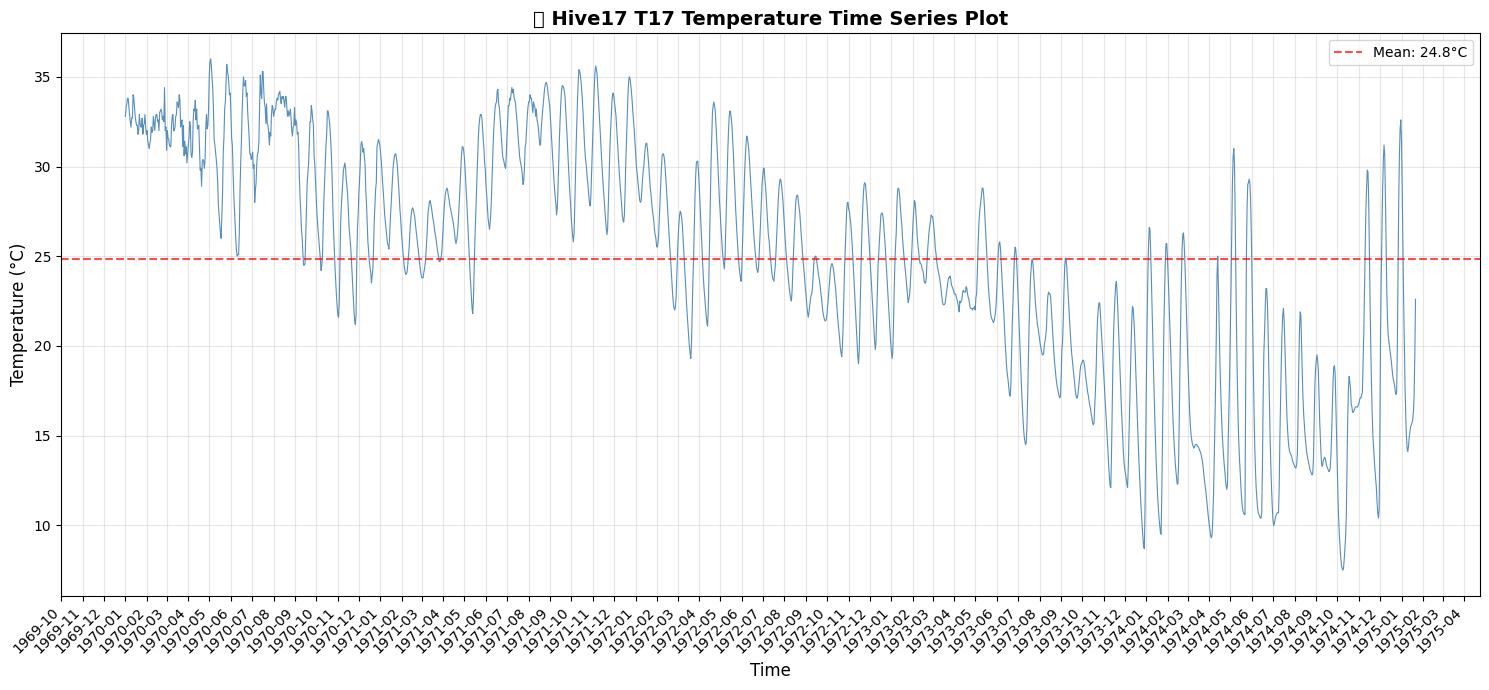

✅ 개선된 그래프 - 시간 축 레이블 겹침 해결!


In [46]:
# 개선된 T17 시간 플롯 - 시간 축 레이블 겹침 해결
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd

# 기본 플롯 설정
plt.figure(figsize=(15, 7))
plt.plot(df['DateTime'], df['T17'], 
         color='steelblue', linewidth=0.8, alpha=0.9)

# 평균선 추가
avg_temp = df['T17'].mean()
plt.axhline(y=avg_temp, color='red', linestyle='--', alpha=0.7,
           label=f'Mean: {avg_temp:.1f}°C')

# 제목과 레이블
plt.title('🐝 Hive17 T17 Temperature Time Series Plot', fontsize=14, fontweight='bold')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# 🔧 핵심 수정사항: x축 날짜 포맷팅
ax = plt.gca()

# 방법 1: 자동 날짜 포맷팅 (추천)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))  # 2주 간격

# 방법 2: 월 단위로 표시하고 싶다면
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# 방법 3: 더 간단한 포맷
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))  # 7일 간격

# 레이블 회전 및 간격 조정
plt.xticks(rotation=45, ha='right')  # ha='right'로 정렬 개선
plt.tight_layout()  # 자동 레이아웃 조정으로 겹침 방지
plt.show()

print("✅ 개선된 그래프 - 시간 축 레이블 겹침 해결!")

In [47]:
from statsmodels.tsa.seasonal import STL

stl = STL(df["T17"], period=24, robust=True) 
result = stl.fit()

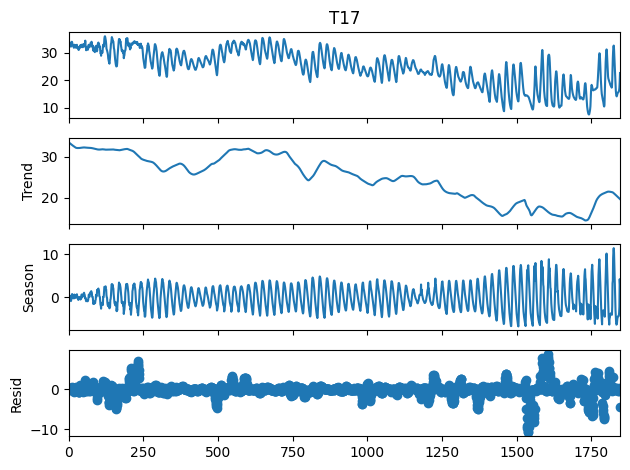

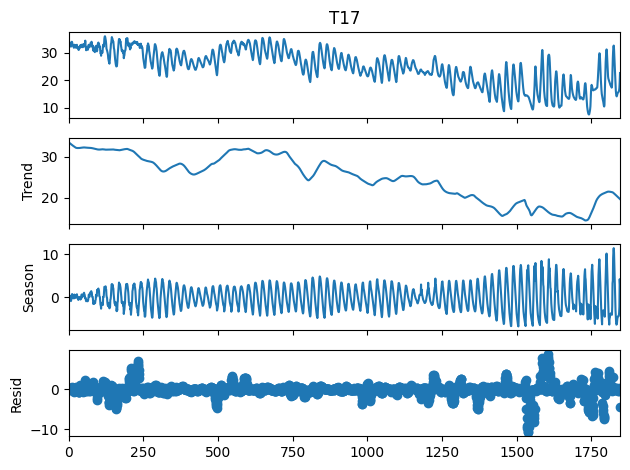

In [48]:
result.plot()

<Axes: ylabel='Frequency'>

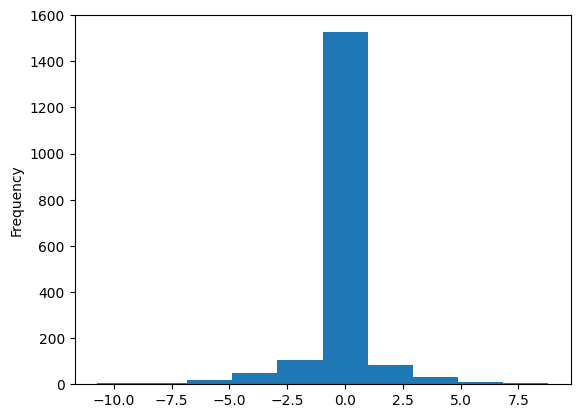

In [49]:
result.resid.plot.hist()

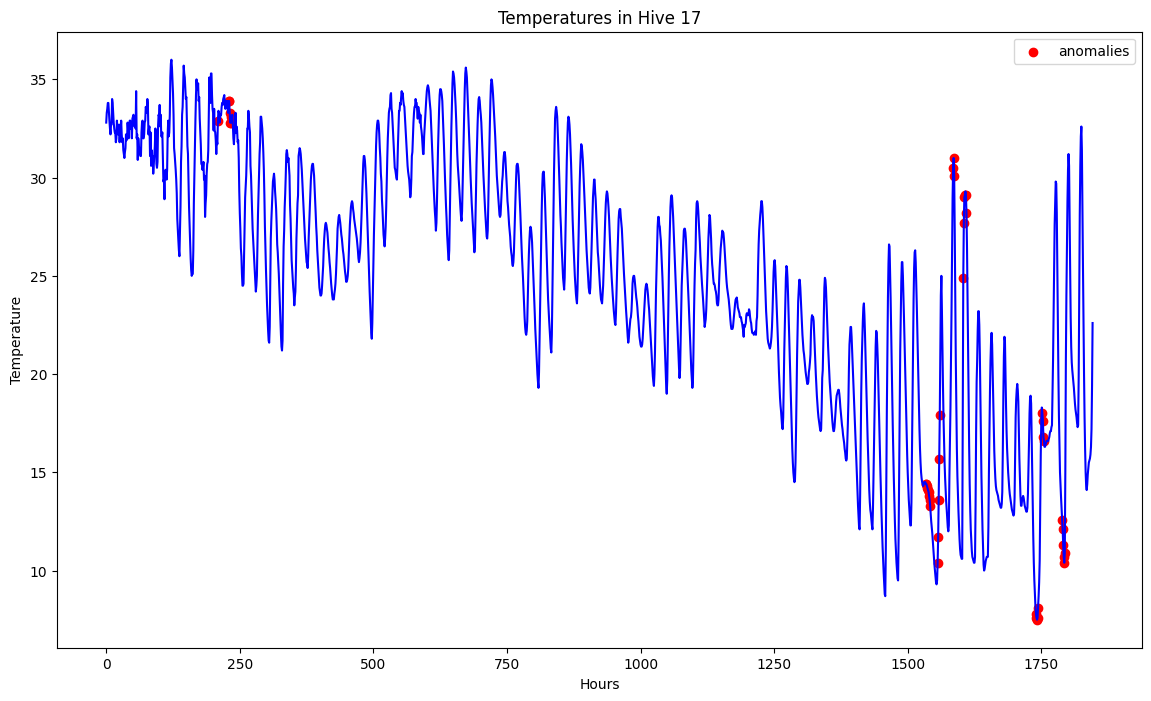

In [50]:
import matplotlib.pyplot as plt

threshold = 5
anomalies_filter = result.resid.apply(lambda x: True if abs(x) > threshold else False)
anomalies = df["T17"][anomalies_filter]

plt.figure(figsize=(14, 8))
plt.scatter(x=anomalies.index, y=anomalies, color="red", label="anomalies")
plt.plot(df.index, df['T17'], color='blue')
plt.title('Temperatures in Hive 17')
plt.xlabel('Hours')
plt.ylabel('Temperature')
plt.legend()
plt.show()